In [1]:
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt
%matplotlib inline

# Machine Learning: Optimisation

Optimisation allows us to select the best parameters, associated with the machine learning algorithm or method we are using, for our problem case.

given a known **objective function**  $g: \Re^m \rightarrow \Re$


find a **minimizer** $𝜔^⋆$ of $g$, defined by $g({𝜔}^⋆) = min_{𝜔 \Subset {\Re}^m} g(𝜔)$

optimisation methods are **iterative**:

* begin with an initial guess of the minimizer, $𝜔^1$
* for each iteration t = 1, 2, 3,…, they construct a new approximation $𝜔^{t+1}$
* stop once reached convergence criteria

## convex function vs non-convex function

### *convex* function

* f is above all its tangents

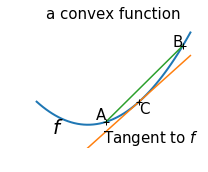

In [2]:
x = np.linspace(-1, 2)

plt.figure(1, figsize=(3, 2.5))
plt.clf()

# A convex function
plt.plot(x, x**2, linewidth=2)
plt.text(-.7, -.6**2, '$f$', size=20)

# The tangent in one point
plt.plot(x, 2*x - 1)
plt.plot(1, 1, 'k+')
plt.text(.3, -.75, "Tangent to $f$", size=15)
plt.text(1, 1 - .5, 'C', size=15)

# Convexity as barycenter
plt.plot([.35, 1.85], [.35**2, 1.85**2])
plt.plot([.35, 1.85], [.35**2, 1.85**2], 'k+')
plt.text(.35 - .2, .35**2 + .1, 'A', size=15)
plt.text(1.85 - .2, 1.85**2, 'B', size=15)

plt.ylim(ymin=-1)
plt.axis('off')
plt.tight_layout()
plt.title("a convex function", size = 15)

plt.ylim(ymin=-1)
plt.axis('off')

plt.tight_layout()
plt.show()

* for two point A, B, f(C) lies below the segment [f(A), f(B])], if A < C < B

### *non-convex* function

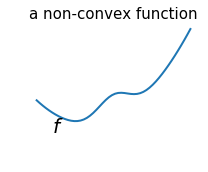

In [3]:
plt.figure(2, figsize=(3, 2.5))
plt.clf()
plt.plot(x, x**2 + np.exp(-5*(x - .5)**2), linewidth=2)
plt.text(-.7, -.6**2, '$f$', size=20)
plt.title("a non-convex function", size = 15)

plt.ylim(ymin=-1)
plt.axis('off')

plt.tight_layout()
plt.show()

## SciPy's Optimizers

* create an arbitrary loss function

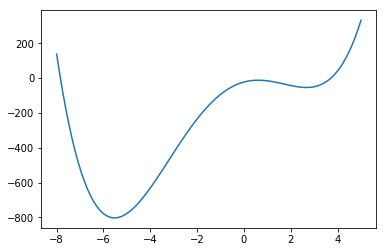

In [4]:
def f(x):
    return x**4 + 3*(x-2)**3 - 15*(x)**2 + 1

x = np.linspace(-8, 5, 100)
plt.plot(x, f(x));

* The [minimize_scalar](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html#scipy.optimize.minimize_scalar) function will find the minimum

    * default method is [Brent’s algorithm](https://en.wikipedia.org/wiki/Brent%27s_method), which uses inverse parabolic interpolation

In [5]:
res = optimize.minimize_scalar(f)
res.x

-5.528801125219663

In [6]:
res

# Values of objective function
# Number of evaluations of the objective functions
# Number of iterations performed by the optimizer
# Whether or not the optimizer exited successfully
# The solution of the optimization

     fun: -803.3955308825884
    nfev: 12
     nit: 11
 success: True
       x: -5.528801125219663

### Local Minima

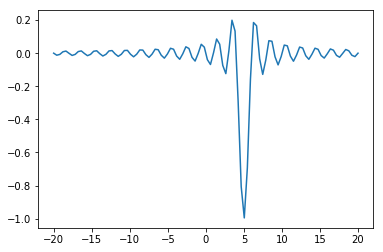

In [7]:
def f(x, offset):
    return -np.sinc(x-offset)

x = np.linspace(-20, 20, 100)
plt.plot(x, f(x, 5))

In [8]:
res = optimize.minimize_scalar(f, args=(5,))
res.x

-1.4843871263953001

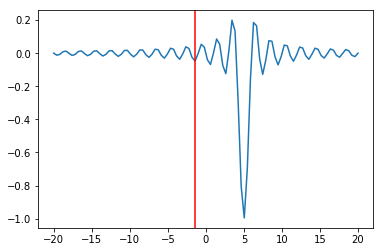

In [9]:
plt.plot(x, f(x, 5))
plt.axvline(res.x, c='r')

* where did the optimiser start to look from?

In [10]:
res.fun

-0.049029624014074166

### Global Minima

* start from multiple starting points

In [11]:
lower = np.random.uniform(-20, 20, 100)
upper = lower + 1
res = [optimize.minimize_scalar(f, args=(5,), bracket=(l, u)) for (l, u) in zip(lower, upper)]

In [12]:
idx = np.argmin([m.fun for m in res])
solution = res[idx]

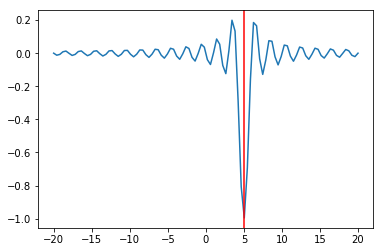

In [13]:
plt.plot(x, f(x, 5))
plt.axvline(solution.x, c='r');